In [13]:
# import pandas_datareader.data as web
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# from hmmlearn import hmm



# type_ = "compound"
type_ = "Close"
threshold = 0.001


In [19]:
def get_df(type_, threshold):
    df=pd.read_csv("Feature Vector Apple.csv")
    dates=df['Filtered_Date']
    # x=df['Close']
    x=df[type_]
    x=x.to_numpy()
    df



    high=x[0]
    low=x[0]
    returns=[]
    tmv=[]
    time=0
    up=0
    down=0
    dc=0
    time_high=0
    time_low=0
    first_time=0
    for i in range(1,len(x)):
        time=time+1
        if(up==0 and down==0):
            if(x[i]>=(1+threshold)*high):
                up=1
                down=0
                high=x[i]
                time_high=time
                first_time=time
            elif(x[i]<=(1-threshold)*low):
                down=1
                up=0
                low=x[i]
                time_low=time
                first_time=time
            else:
                pass
        elif(up==1 and dc==0):
            if(x[i]>=(1+threshold)*high):
                up=1
                down=0
                high=x[i]
                time_high=time
            elif(x[i]<=(1-threshold)*high):
                dc=1
                down=1
                up=0
                low=x[i]
                time_low=time
            else:
                pass
        elif(down==1 and dc==0):
            if(x[i]<=(1-threshold)*low):
                up=0
                down=1
                low=x[i]
                time_low=time
            elif(x[i]>=(1+threshold)*low):
                dc=1
                down=0
                up=1
                high=x[i]
                time_high=time
            else:
                pass
        elif(up==1 and dc==1):
            if(x[i]>=(1+threshold)*high):
                up=1
                down=0
                high=x[i]
                time_high=time
            elif(x[i]<=(1-threshold)*high):


                t_bw_trend=abs(time_high-time_low)
                r=[abs((low-high)/(low*t_bw_trend))]*t_bw_trend
                tm=[(high-low)/(low*threshold)]*t_bw_trend

                returns.extend(r)
                tmv.extend(tm)
                low=x[i]
                time_low=time
                up=0
                down=1
            else:
                pass
        elif(down==1 and dc==1):
            if(x[i]<=(1-threshold)*low):
                up=0
                down=1
                low=x[i]
                time_low=time
            elif(x[i]>=(1+threshold)*low):

                t_bw_trend=abs(time_high-time_low)
                r=[abs((low-high)/(high*t_bw_trend))]*t_bw_trend
                tm=[(low-high)/(high*threshold)]*t_bw_trend

                returns.extend(r)
                tmv.extend(tm)
                high=x[i]
                time_high=time
                up=1
                down=0
            else:
                pass
        else:
            pass




    buffer_beginning=[returns[0]]*first_time
    returns.extend(buffer_beginning)
    buffer_end=[returns[len(returns)-1]]*(time-(len(returns)-1))
    returns.extend(buffer_end)

    returns=np.array(returns)

    buffer_beginning=[tmv[0]]*first_time
    tmv.extend(buffer_beginning)
    buffer_end=[tmv[len(tmv)-1]]*(time-(len(tmv)-1))
    tmv.extend(buffer_end)

    tmv=np.array(tmv)



    for i in range(len(returns)):
        returns[i]=math.log(returns[i])

    df['Returns']=returns
    df['TMV']=tmv



    df['Regime']=" "
    df["D_ret"]=' '
    df["D_ret"]=df[type_].pct_change()
    df["22_ret"]=df[type_].pct_change(22)
    df["66_ret"]=df[type_].pct_change(66)
    df["Vol"]=df[type_].pct_change().rolling(22).std()

    df=df.dropna()
    # df.head()
    return df



In [ ]:
# type_ = "compound"
type_ = "Close"

thresold_arr = [0.0001, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1,0.5,0.8,1]
threshold = 0.001

df = get_df(type_, threshold)

corr_matrix = df.corr()
def fun(y):
    return abs(y)

series = corr_matrix[type_].copy()
series["Sorted"] = corr_matrix[type_].sort_values().apply(fun)
a = series["Sorted"].sort_values(ascending = False)

print(type_, a["Returns"])

a


0.0001 0.06223156359406132
0.001 0.07445573153888146
0.005 0.12683993517358114
0.01 0.14977820024360333
0.02 0.2253500043628474
0.05 0.1535011230130985
0.1 0.07722532426608479


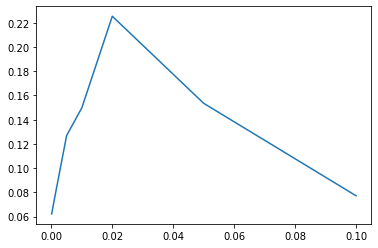

In [22]:
# type_ = "compound"
type_ = "Close"

thresold_arr = [0.0001, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1,0.5,0.8,1]
# threshold = 0.001
x_arr = []
y_arr = []
for threshold in thresold_arr:
    try:
        df = get_df(type_, threshold)

        corr_matrix = df.corr()
        def fun(y):
            return abs(y)

        series = corr_matrix[type_].copy()
        series["Sorted"] = corr_matrix[type_].sort_values().apply(fun)
        a = series["Sorted"].sort_values(ascending = False)

        print(threshold, a["Returns"])
        x_arr.append(threshold)
        y_arr.append(a["Returns"])
    
    except:
        pass
import matplotlib.pyplot as plt
plt.plot(x_arr, y_arr)
plt.show()

In [7]:
if type_ == "Close":
    df[["Filtered_Date","Returns", "TMV","D_ret", "22_ret","66_ret","Vol"]].to_csv("Closing price directional change (APPLE).csv")
elif type_ == "compound":
    df[["Filtered_Date","Returns", "TMV","D_ret", "22_ret","66_ret","Vol"]].to_csv("Sentiment score directional change (APPLE).csv")

In [10]:
df['Date'] = pd.to_datetime(df['Filtered_Date'], format='%Y-%m-%d')
# X_train=df.loc[(df['Date'] < '2003-04-30')]
X=df.loc[:,["Returns","22_ret","66_ret","Vol"]] 
print(X.corr())





          Returns    22_ret    66_ret       Vol
Returns  1.000000 -0.125598 -0.246008  0.288990
22_ret  -0.125598  1.000000  0.562135 -0.395394
66_ret  -0.246008  0.562135  1.000000 -0.574057
Vol      0.288990 -0.395394 -0.574057  1.000000


<ipython-input-10-b7f1cb8fe7af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Filtered_Date'], format='%Y-%m-%d')


In [12]:
from scipy.stats import poisson
scores = list()
models = list()
for n_components in range(1, 5):
    for idx in range(10):
        model = hmm.GaussianHMM(n_components=n_components, random_state=idx)
        model.fit(X)
        models.append(model)
        scores.append(model.score(X))
model = models[np.argmax(scores)]
df["Regime"]=model.predict(X)
df["Regime"]=df['Regime'].shift(1)
df["Daily"]=' '
df["Daily"]=df["Close"].pct_change()
MEAN=df[["Regime", "Daily"]].groupby("Regime").mean()
STD=df[["Regime", "Daily"]].groupby("Regime").std()


In [13]:
print(MEAN)
print(STD)

           Daily
Regime          
0.0     0.000128
1.0     0.002015
2.0     0.000359
3.0    -0.000503
           Daily
Regime          
0.0     0.013350
1.0     0.010963
2.0     0.009135
3.0     0.026613


In [14]:
list_of_predictions=[]
mstd=[]
from datetime import datetime
from dateutil import rrule

start_date = datetime(2003, 5, 31)
end_date = datetime(2022, 7, 31)
# t=model.transmat_
# m=model.means_
# c=model.covars_
pd.options.mode.chained_assignment = None

from dateutil.relativedelta import relativedelta
dt=start_date
while(dt<end_date+relativedelta(days=1)):
    X_train=df.loc[(df['Date'] <= dt)]
    dates=X_train["Date"]
    X=X_train.loc[:,["Returns","22_ret","66_ret","Vol"]]
    scores = list()
    models = list()
    for n_components in range(4,5):
        for idx in range(1):
            model = hmm.GaussianHMM(n_components=n_components,init_params="s", random_state=idx)
#             model.transmat_ = t
#             model.means_ = m
#             model.covars_ = np.array([np.diag(i) for i in c])
            model.fit(X)
            models.append(model)
            scores.append(model.score(X))
    model = models[np.argmax(scores)]
#     t=model.transmat_
#     m=model.means_
#     c=model.covars_
    pred=model.predict(X)
    X_train["Regime"]=pred
    X_train["Regime"]=X_train['Regime'].shift(1)
    X_train["D_ret"]=' '
    X_train["D_ret"]=X_train["Close"].pct_change()
    MEAN=X_train[["Regime", "D_ret"]].groupby("Regime").mean()
    STD=X_train[["Regime", "D_ret"]].groupby("Regime").std()
    list_of_predictions.append((dates,pred))
    mstd.append((MEAN,STD))
    dt=dt+relativedelta(months=1)

    




In [15]:
excel=pd.DataFrame()
col=0
for i in range(0,len(list_of_predictions)):
    df_add=pd.DataFrame()
    df_mstd=pd.DataFrame()
    df_rank=pd.DataFrame()
    df_add[str(col)]=list_of_predictions[i][0]
    col=col+1
    df_add["Pred"]=list_of_predictions[i][1]
    col=col+1
    df_mstd["Mean"]=mstd[i][0]["D_ret"].to_numpy()
    df_mstd["STD"]=mstd[i][1]["D_ret"].to_numpy()
    df_mstd["Vals"]=df_mstd["Mean"]/df_mstd["STD"]
    nums=np.array([0,1,2,3])
    df_mstd["Regime"]=nums
    df_mstd=df_mstd.sort_values(by=["Vals"]).reset_index(drop=True)
    df_rank["Rank"]=df_mstd["Regime"]
    dict_map = {df_rank["Rank"][0]:'WORST' ,  df_rank["Rank"][1]:'SECOND WORST', df_rank["Rank"][2]:'SECOND BEST', df_rank["Rank"][3]:'BEST'}
    df_add["Pred"] = df_add["Pred"].map(dict_map)
    excel = pd.concat([excel, df_add], axis=1)
    


excel.to_excel("/Users/devanshjoshi/Desktop/output1.xlsx")

    

    